In [2]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [3]:
# Carregar a base de dados

path = kagglehub.dataset_download("ankushpanday1/global-dataset-on-1gb-internet-pricing")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 27.0k/27.0k [00:00<00:00, 3.98MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday1/global-dataset-on-1gb-internet-pricing/versions/1


['Data pricing.xlsx']

In [4]:
path = '/root/.cache/kagglehub/datasets/ankushpanday1/global-dataset-on-1gb-internet-pricing/versions/1'
df = pd.read_excel(path + '/Data pricing.xlsx')

## Propriedades dos dados:

In [ ]:
df.head()

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Global Totals (2023),Unnamed: 12
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,24-07-2023,Total number of countries,237.000
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,25-07-2023,Most expensive 1GB,138.190
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,19-07-2023,Cheapest 1GB,0.001
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09 00:00:00,Average package price globally,0.460
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09 00:00:00,Total packages included in study,5603.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Continental region                         237 non-null    object 
 1   Plans measured                             237 non-null    int64  
 2   Average price of 1GB (local currency)      237 non-null    float64
 3   Currency                                   237 non-null    object 
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64
 5   Average price of 1GB (USD)                 237 non-null    float64
 6   Cheapest 1GB (Local currency)              237 non-null    float64
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64
 8   Most expensive 1GB (Local currency)        237 non-null    float64
 9   Most expensive 1GB (USD)                   237 non-null    float64
 10  Sample date               

In [ ]:
df.isnull().sum()

,0
Continental region,0
Plans measured,0
Average price of 1GB (local currency),0
Currency,0
Conversion rate (USD) (Frozen 07/09/2023),0
Average price of 1GB (USD),0
Cheapest 1GB (Local currency),0
Cheapest 1GB for 30 days (USD),0
Most expensive 1GB (Local currency),0
Most expensive 1GB (USD),0


## Explorando os dados:

In [ ]:
# Vamos remover as colunas com valores nulos

df = df.drop(columns=['Unnamed: 12', 'Global Totals (2023)'])

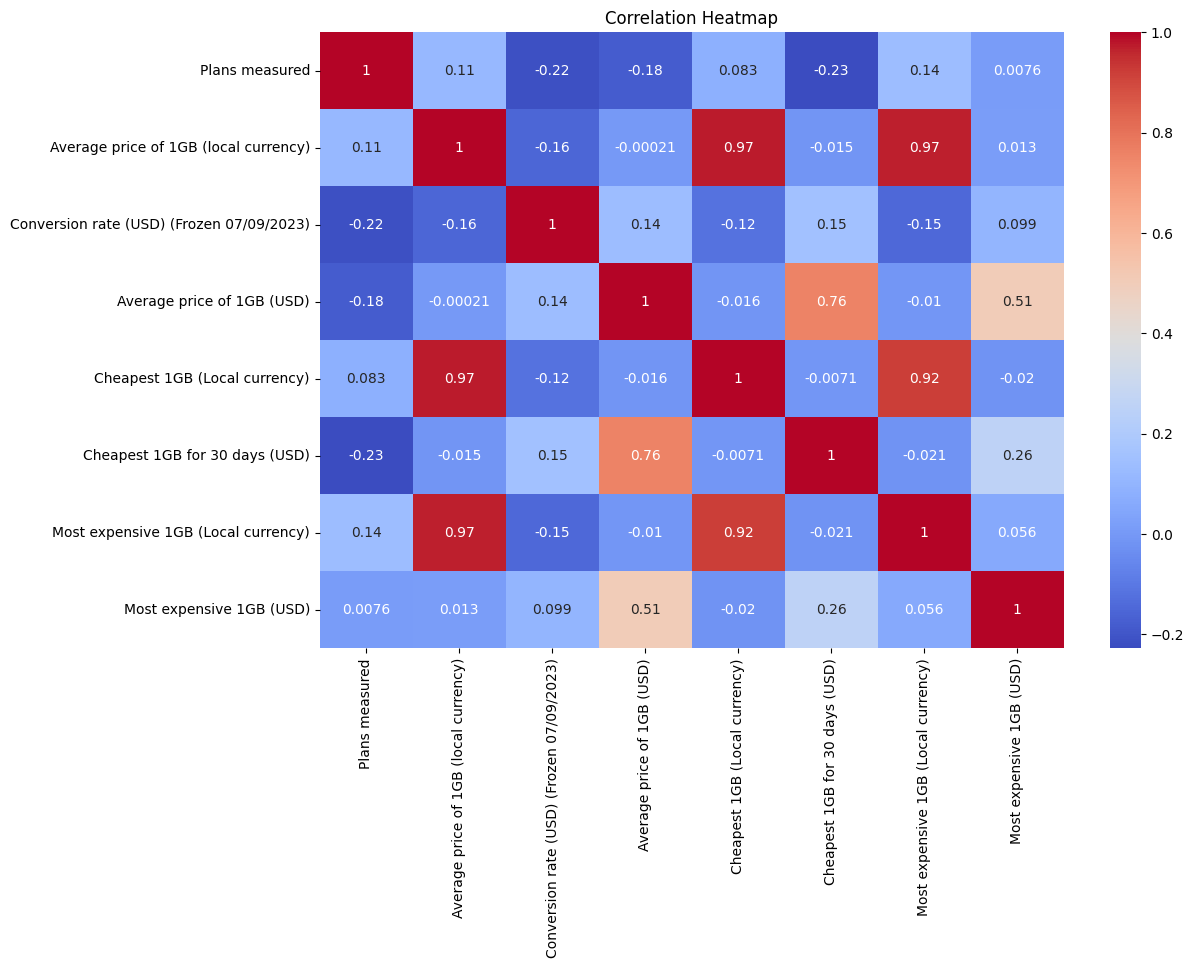

In [ ]:
# Gerando mapa de calor

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

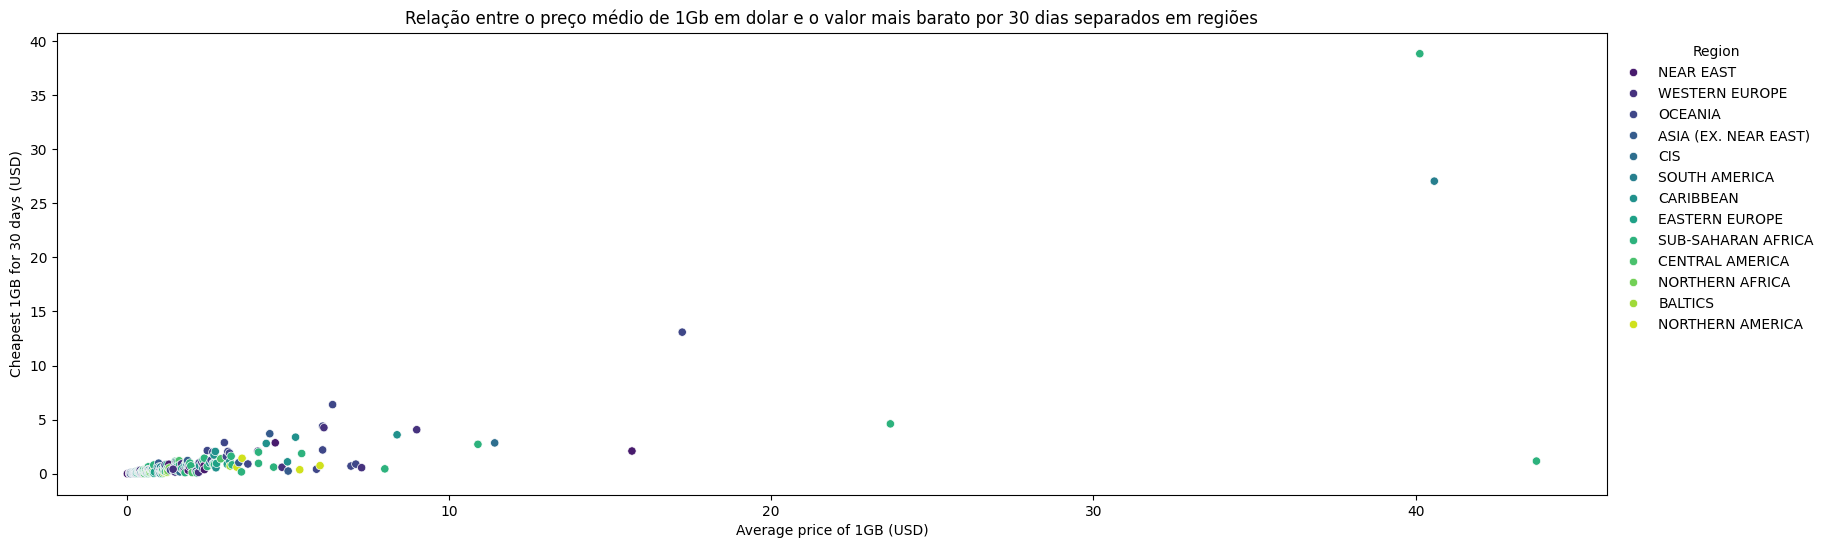

In [ ]:
# Verificando a relação entre as variáveis

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Average price of 1GB (USD)', y='Cheapest 1GB for 30 days (USD)', hue='Continental region', palette='viridis')
plt.title('Relação entre o preço médio de 1Gb em dolar e o valor mais barato por 30 dias separados em regiões')
plt.xlabel('Average price of 1GB (USD)')
plt.ylabel('Cheapest 1GB for 30 days (USD)')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

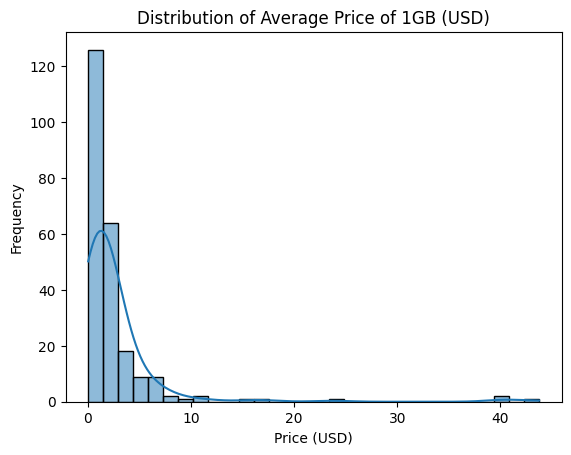

In [ ]:
#Preço médio de um gb em dolar

sns.histplot(df['Average price of 1GB (USD)'], bins=30, kde=True)
plt.title('Distribution of Average Price of 1GB (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

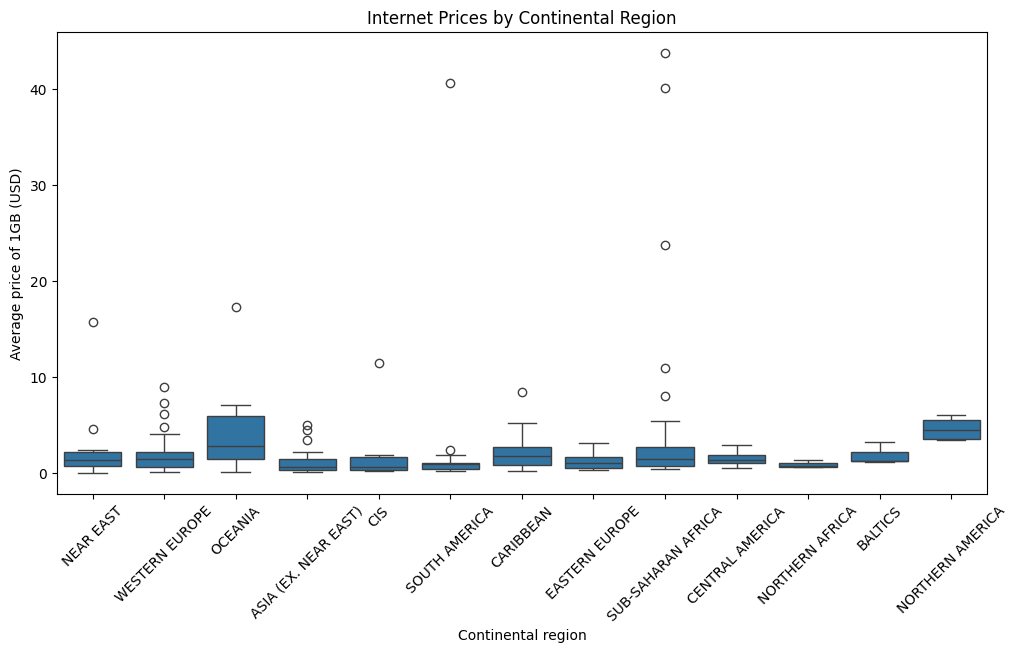

In [ ]:
# Verificando se existem outliers e onde estão
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continental region', y='Average price of 1GB (USD)', data=df)
plt.title('Internet Prices by Continental Region')
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-7163b26f6032>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Average price of 1GB (USD)', y='Plans measured', style='Continental region', palette='viridis')


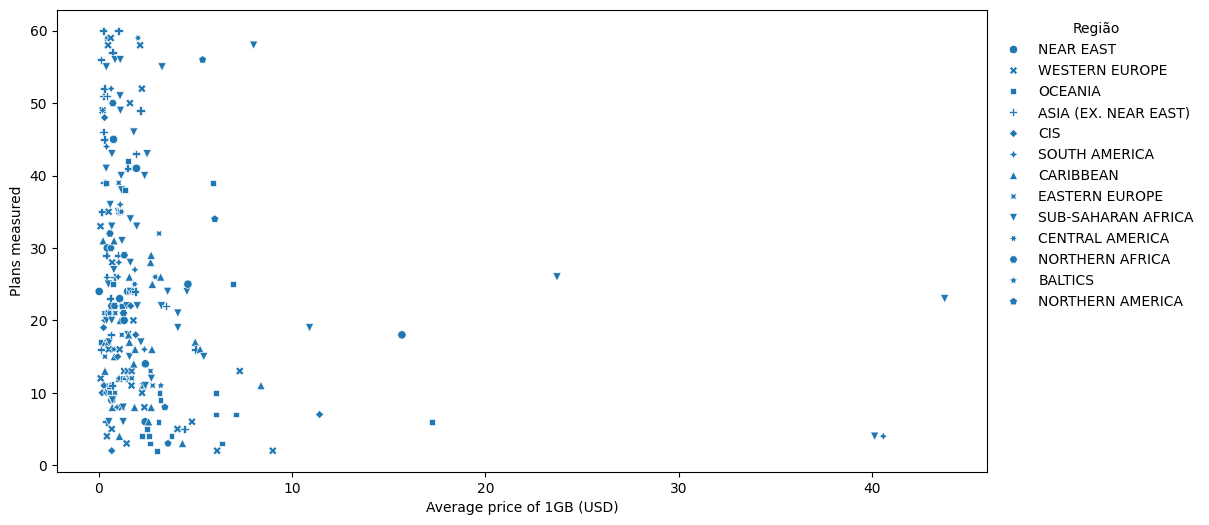

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o estilo do seaborn para um visual mais limpo
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))

# Scatterplot com ajustes
sns.scatterplot(
    data=df,
    x='Average price of 1GB (USD)',
    y='Plans measured',
    style='Continental region',
    palette='viridis',  # Ou troque por uma paleta mais colorida, como 'coolwarm', 'Set2', etc.
    s=100,  # Ajustando o tamanho do marcador para mais visibilidade
    edgecolor='black',  # Bordas mais visíveis nos pontos
    linewidth=1  # Contorno mais nítido
)

# Ajustes do título e labels
plt.title('Relação entre o Preço Médio por 1GB e o Número de Planos por Região Continental', fontsize=14)
plt.xlabel('Preço médio de 1GB (USD)', fontsize=12)
plt.ylabel('Número de Planos Medidos', fontsize=12)

# Personalização da legenda
plt.legend(
    title='Região Continental',
    loc='upper left',
    bbox_to_anchor=(1, 1),  # Colocando a legenda fora do gráfico para evitar sobrecarga visual
    frameon=False,
    fontsize=10,
    title_fontsize=12  # Tamanho da fonte do título da legenda
)

# Ajuste dos limites dos eixos, caso necessário, para uma melhor visualização
plt.xlim(0, df['Average price of 1GB (USD)'].max() + 5)  # Ajuste dependendo dos dados
plt.ylim(0, df['Plans measured'].max() + 10)

# Exibir o gráfico
plt.tight_layout()  # Ajuste para garantir que tudo fique bem visível
plt.show()

<ipython-input-17-130eebe10f03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


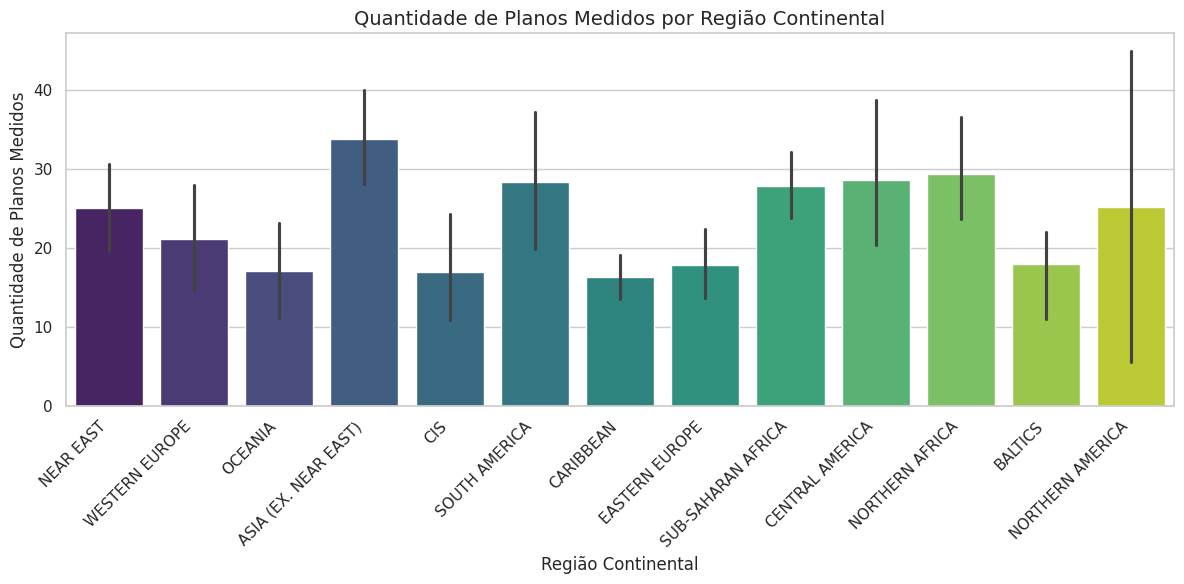

In [17]:
# Ajustando o estilo do seaborn para um visual mais limpo
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Continental region',  # Região continental no eixo x
    y='Plans measured',  # Quantidade de planos no eixo y
    palette='viridis'  # Paleta de cores
)

# Ajustes do título e labels
plt.title('Quantidade de Planos Medidos por Região Continental', fontsize=14)
plt.xlabel('Região Continental', fontsize=12)
plt.ylabel('Quantidade de Planos Medidos', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()
